# Additional Holdout Set Notebook

(Completed post-Flatiron)

# Importing Packages

In [17]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

from utils import *

%reload_ext autoreload
%autoreload 2

# Importing Additional Holdout Set

In [2]:
df = pd.read_csv("../data/test_2017.csv", index_col=0)
df.head()

,file,age,gender,target
0,ISIC_0000000,55.0,female,0
1,ISIC_0000001,30.0,female,0
2,ISIC_0000002,60.0,female,1
3,ISIC_0000003,30.0,male,0
4,ISIC_0000004,80.0,male,1


# VGG16-Based CNN Model

## Whole Model after Training

In [21]:
test_fldr = '../split/test2'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

Found 2000 images belonging to 2 classes.


In [20]:
# load entire model after training proccess
model_cnn1 = load_model('../models/cnn_v1')

2000/2000 [==============================] - 547s 273ms/step


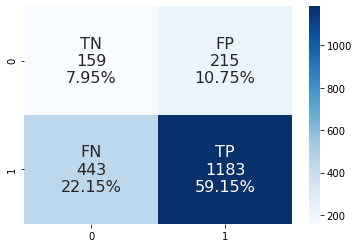

In [22]:
# display confusion matrix visualization
pred = model_cnn1.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred = pred > 0.5
make_confusion_matrix(y_true, y_pred)

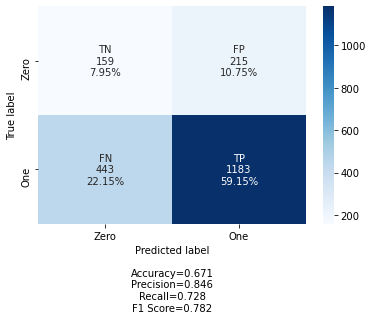

In [24]:
cf = confusion_matrix(y_true, y_pred)
make_confusion_matrix_2(cf,
                        group_names=['TN', 'FP', 'FN', 'TP'],
                        categories = ['Zero', 'One'])

In [32]:
# get testing accuracy and loss
test_generator.reset()
score = model_cnn1.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]))
print("Precision: " + str(score[2]))
print("Recall: " + str(score[3]))
print("ROC-AUC: " + str(score[4]))
print("PR-AUC: " + str(score[5]))

2000/2000 [==============================] - 508s 254ms/step - loss: 0.8448 - accuracy: 0.6710 - auc: 0.5852 - auc_1: 0.8437 - precision: 0.8462 - recall: 0.7276
Loss: 0.8447545766830444
Accuracy: 0.6710000038146973
Precision: 0.5852424502372742
Recall: 0.8436755537986755
ROC-AUC: 0.8462088704109192
PR-AUC: 0.7275522947311401


# Final CNN Model

## Whole Model Saved After Training

In [51]:
test_fldr = '../split/test2'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

Found 2000 images belonging to 2 classes.


In [24]:
# load entire model after training proccess
model_cnn2 = load_model('../models/cnn_final')

2000/2000 [==============================] - 326s 163ms/step


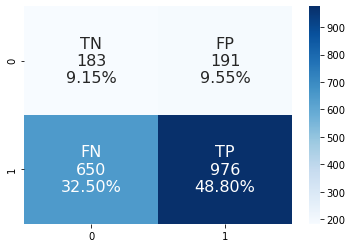

In [49]:
# display confusion matrix visualization
pred2 = model_cnn2.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred2 = pred2 > 0.5
make_confusion_matrix(y_true, y_pred2)

In [50]:
# get testing accuracy and loss
test_generator.reset()
score2 = model_cnn2.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score2[0]))
print("Accuracy: " + str(score2[1]))
print("Precision: " + str(score2[2]))
print("Recall: " + str(score2[3]))
print("ROC-AUC: " + str(score2[4]))
print("PR-AUC: " + str(score2[5]))

2000/2000 [==============================] - 325s 162ms/step - loss: 1.2612 - accuracy: 0.5795 - auc: 0.5760 - auc_1: 0.8509 - precision: 0.8363 - recall: 0.6002
Loss: 1.26120924949646
Accuracy: 0.5795000195503235
Precision: 0.5760000944137573
Recall: 0.8509212136268616
ROC-AUC: 0.8363324999809265
PR-AUC: 0.600246012210846


## Model with Lowest Validation Loss

In [4]:
model_cnn2a = load_model('../logs/log_cnn2/model.06-0.17.hdf5')

2000/2000 [==============================] - 680s 340ms/step


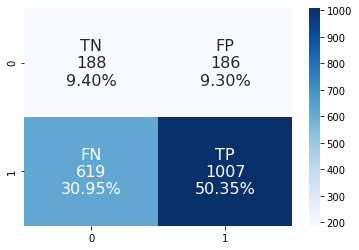

In [5]:
# display confusion matrix visualization
test_generator.reset()
pred2a = model_cnn2a.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred2a = pred2a > 0.5
make_confusion_matrix(y_true, y_pred2a)

In [6]:
# get testing accuracy and loss
test_generator.reset()
score2a = model_cnn2a.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score2a[0]))
print("Accuracy: " + str(score2a[1]))
print("Precision: " + str(score2a[2]))
print("Recall: " + str(score2a[3]))
print("ROC-AUC: " + str(score2a[4]))
print("PR-AUC: " + str(score2a[5]))

2000/2000 [==============================] - 449s 224ms/step - loss: 0.8798 - accuracy: 0.5975 - auc: 0.5809 - auc_1: 0.8469 - precision: 0.8441 - recall: 0.6193
Loss: 0.8797648549079895
Accuracy: 0.5975000262260437
Precision: 0.5808535814285278
Recall: 0.8468694090843201
ROC-AUC: 0.8440905213356018
PR-AUC: 0.6193112134933472


# AlexNet

## Whole Model Saved After Training

In [25]:
test_fldr = '../split/test2'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (227, 227),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

Found 2000 images belonging to 2 classes.


In [26]:
# load entire model after training proccess
model_alex = load_model('../models/alexnet')

2000/2000 [==============================] - 379s 189ms/step


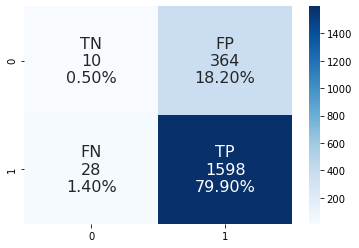

In [27]:
# display confusion matrix visualization
pred3 = model_alex.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred3 = pred3 > 0.5
make_confusion_matrix(y_true, y_pred3)

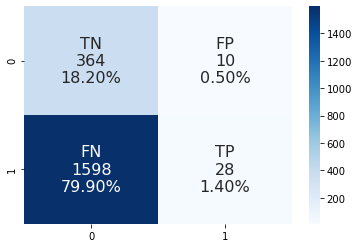

In [34]:
y_pred_3 = pred3 < 0.5
make_confusion_matrix(y_true, y_pred_3)

In [32]:
pred3

array([[0.69388264],
       [0.00247586],
       [0.3734535 ],
       ...,
       [0.9999421 ],
       [0.7639655 ],
       [0.5315983 ]], dtype=float32)

In [33]:
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [31]:
y_pred_3 = np.argmax(pred3, axis=1)
confusion_matrix(test_generator.classes, y_pred_3)

array([[ 374,    0],
       [1626,    0]])

In [9]:
# get testing accuracy and loss
test_generator.reset()
score3 = model_alex.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score3[0]))
print("Accuracy: " + str(score3[1]))
print("Precision: " + str(score3[2]))
print("Recall: " + str(score3[3]))
print("ROC-AUC: " + str(score3[4]))
print("PR-AUC: " + str(score3[5]))

2000/2000 [==============================] - 444s 222ms/step - loss: 1.5783 - accuracy: 0.8040 - precision_1: 0.8145 - recall_1: 0.9828 - auc_2: 0.5363 - auc_3: 0.8223
Loss: 1.578322410583496
Accuracy: 0.8040000200271606
Precision: 0.8144749999046326
Recall: 0.9827798008918762
ROC-AUC: 0.5363264083862305
PR-AUC: 0.8223297595977783


# MobileNet

## Whole Model Saved After Training

In [10]:
test_fldr = '../split/test2'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

Found 2000 images belonging to 2 classes.


In [36]:
# load entire model after training proccess
 model_mob = load_model('../models/mobilenet')

2000/2000 [==============================] - 429s 214ms/step


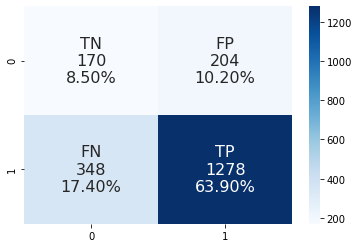

In [37]:
# display confusion matrix visualization
pred4 = model_mob.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred4 = pred4 > 0.5
make_confusion_matrix(y_true, y_pred4)

In [55]:
# get metrics for holdout set
test_generator.reset()
score4 = model_mob.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score4[0]))
print("Accuracy: " + str(score4[1]))
print("Precision: " + str(score4[2]))
print("Recall: " + str(score4[3]))
print("ROC-AUC: " + str(score4[4]))
print("PR-AUC: " + str(score4[5]))

2000/2000 [==============================] - 360s 180ms/step - loss: 1.3089 - accuracy: 0.7240 - precision: 0.8623 - recall: 0.7860 - auc: 0.6720 - auc_1: 0.8822
Loss: 1.3088557720184326
Accuracy: 0.7239999771118164
Precision: 0.862348198890686
Recall: 0.785977840423584
ROC-AUC: 0.6719650030136108
PR-AUC: 0.8822048306465149


## Model with Lowest Validation Loss

In [11]:
model_mob2 = load_model("../logs/log_mobilenet/model.04-0.14.hdf5")

2000/2000 [==============================] - 372s 186ms/step


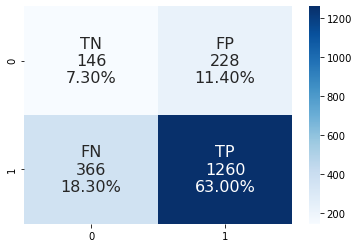

In [60]:
# display confusion matrix visualization
test_generator.reset()
pred4a = model_mob2.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred4a = pred4a > 0.5
make_confusion_matrix(y_true, y_pred4a)

In [ ]:
make_confusion_matrix_2

In [12]:
# get testing accuracy and loss
test_generator.reset()
score4a = model_mob2.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score4a[0]))
print("Accuracy: " + str(score4a[1]))
print("Precision: " + str(score4a[2]))
print("Recall: " + str(score4a[3]))
print("ROC-AUC: " + str(score4a[4]))
print("PR-AUC: " + str(score4a[5]))

2000/2000 [==============================] - 733s 366ms/step - loss: 0.8050 - accuracy: 0.7030 - precision: 0.8468 - recall: 0.7749 - auc: 0.6339 - auc_1: 0.8733
Loss: 0.8050376176834106
Accuracy: 0.703000009059906
Precision: 0.8467742204666138
Recall: 0.7749077677726746
ROC-AUC: 0.6339101791381836
PR-AUC: 0.8732956051826477


# VGG19

## Whole Modwl Saved After Training

In [13]:
test_fldr = '../split/test2'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (224, 224),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

Found 2000 images belonging to 2 classes.


In [39]:
# load entire model after training proccess
model_vgg19 = load_model('../models/vgg19')

2000/2000 [==============================] - 535s 267ms/step


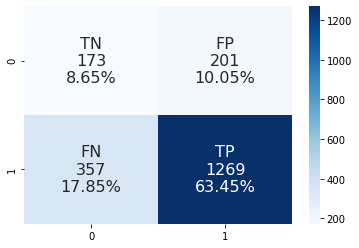

In [41]:
# display confusion matrix visualization
pred5 = model_vgg19.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred5 = pred5 > 0.5
make_confusion_matrix(y_true, y_pred5)

In [62]:
# get testing accuracy and loss
test_generator.reset()
score5 = model_vgg19.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score5[0]))
print("Accuracy: " + str(score5[1]))
print("Precision: " + str(score5[2]))
print("Recall: " + str(score5[3]))
print("ROC-AUC: " + str(score5[4]))
print("PR-AUC: " + str(score5[5]))

2000/2000 [==============================] - 542s 270ms/step - loss: 1.0430 - accuracy: 0.7210 - auc_6: 0.6657 - auc_7: 0.8775 - precision_3: 0.8633 - recall_3: 0.7804
Loss: 1.043032169342041
Accuracy: 0.7210000157356262
Precision: 0.6656808257102966
Recall: 0.8775051832199097
ROC-AUC: 0.863265335559845
PR-AUC: 0.7804428339004517


## Model with Lowest Validation Loss

In [14]:
model_vgg19a = load_model("../logs/log_vgg19/model.07-0.14.hdf5")

2000/2000 [==============================] - 761s 381ms/step


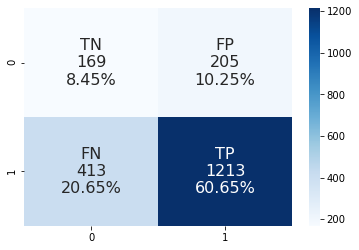

In [15]:
# display confusion matrix visualization
pred5a = model_vgg19a.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred5a = pred5a > 0.5
make_confusion_matrix(y_true, y_pred5a)

In [16]:
# get testing accuracy and loss
test_generator.reset()
score5a = model_vgg19a.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score5a[0]))
print("Accuracy: " + str(score5a[1]))
print("Precision: " + str(score5a[2]))
print("Recall: " + str(score5a[3]))
print("ROC-AUC: " + str(score5a[4]))
print("PR-AUC: " + str(score5a[5]))

2000/2000 [==============================] - 700s 350ms/step - loss: 0.7440 - accuracy: 0.6910 - auc_6: 0.6678 - auc_7: 0.8899 - precision_3: 0.8554 - recall_3: 0.7460
Loss: 0.7440076470375061
Accuracy: 0.6909999847412109
Precision: 0.667758584022522
Recall: 0.8898553848266602
ROC-AUC: 0.8554301857948303
PR-AUC: 0.7460024356842041


$$ Dataframe Comparing Metrics

In [ ]:
# for unlabeled testing set
test_generator = test_datagen.flow_from_directory(
    directory = pred_dir,
    class_mode = None,
    shuffle = False
)
# reset to avoid any unwanted outputs
test_generator.reset()
pred = model.predict_generator(test_generator, verbose=1, steps = STEP_TEST_SIZE)
pred_class = np.argmax(pred, axis=1)
l = dict((v,k) for k,v in train_generator.class_indices.items())
prednames = [l[k] for k in pred_classes]
filenames = test_generator.filenames
finaldf = pd.DataFrame({'Filename': filenames, "Prediction": prednames})